<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/EDA_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/bank-full.csv', sep=',')

___
# Informações sobre o atributo:
## Variáveis ​​de entrada:
### dados do cliente do banco:
1 - idade (numérica) <br>
2 - trabalho: tipo de trabalho (categórico: 'administrador', 'operário', 'empresário', 'empregada doméstica', 'administração', 'aposentado', 'autônomo', 'serviços', 'estudante' , 'técnico', 'desempregado', 'desconhecido')) <br>
3 - conjugal: estado civil (categorial: 'divorciado', 'casado', 'solteiro', 'desconhecido'; observação: 'divorciado' significa divorciado ou viúvo)) <br>
4 - educação (categórica: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown') ) <br>
5 - inadimplência: tem crédito inadimplente? (categórico: 'não', 'sim', 'desconhecido')) <br>
6 - habitação: tem crédito habitacional? (categórico: 'não', 'sim', 'desconhecido')) <br>
7 - empréstimo: tem empréstimo pessoal? (categórica: 'não', 'sim', 'desconhecido'))
### relacionado com o último contato da campanha atual:
8 - contato: tipo de comunicação de contato (categórico: 'celular', 'telefone')) <br>
9 - mês: último mês de contato do ano (categórico: 'jan', 'fev', 'mar', ..., 'nov', 'dez')) <br>
10 - day_of_week: último dia de contato da semana (categórico: 'seg', 'ter', 'qua', 'qui', 'sex')) <br>
11 - duração: duração do último contato, em segundos (numérico). Observação importante: este atributo afeta fortemente a meta de saída (por exemplo, se duração = 0, então y = 'não'). No entanto, a duração não é conhecida antes que uma chamada seja realizada. Além disso, após o final da chamada, y é obviamente conhecido. Assim, esta entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista.)
### outros atributos:
12 - campanha: quantidade de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)) <br>
13 - pdays: número de dias que se passaram depois que o cliente foi contatado pela última vez em uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)) <br>
14 - anterior: quantidade de contatos realizados antes desta campanha e para este cliente (numérico)) <br>
15 - poutcome: resultado da campanha de marketing anterior (categórica: 'fracasso', 'inexistente', 'sucesso')
### atributos de contexto social e econômico
16 - emp.var.rate: taxa de variação do emprego - indicador trimestral (numérico)) <br>
17 - cons.price.idx: índice de preços ao consumidor - indicador mensal (numérico)) <br>
18 - cons.conf.idx: índice de confiança do consumidor - indicador mensal (numérico)) <br>
19 - euribor3m: taxa euribor a 3 meses - indicador diário (numérico)) <br>
20 - nr.empregados: número de funcionários - indicador trimestral (numérico)

### Variável de saída (destino desejado):
21 - y - o cliente subscreveu um depósito a prazo? (binário: 'sim', 'não')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


___
# Tipos de plotagem

Existem vários tipos de parcelas construídas em pandas; a maioria deles são estatísticos por natureza:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
df.plot.box()      box plot
df.plot.kde()      kde plot
df.plot.hexbin()   hexagonal bin plot
df.plot.pie()      pie chart</pre>

Você também pode chamar gráficos específicos passando seus nomes como um argumento, como com `df.plot (kind = 'área')`.

___
## Histogramas
Este é um dos gráficos mais usados. Os histogramas descrevem a distribuição de dados contínuos dividindo os dados em "caixas" de largura igual e plotando o número de valores que caem em cada caixa.

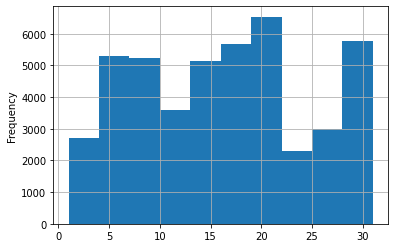

In [6]:
df['day'].plot.hist(grid=True);

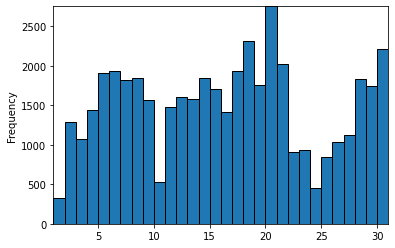

In [7]:
# let's plot it on 30 bin as total number of days in a month are 30
df['day'].plot.hist(bins=30, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

tight- it - irá certificar-se de ajustar os eixos xey de acordo com os valores e sem espaço extra <BR>
axis - determina o eixo para ajustar o aperto em <br>
bins - determina em quantos bins distribuir dados <br>

edgecolor, como 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w' <br>
escalonar automaticamente o eixo pode ser definido como 'x', 'y' ou 'ambos'

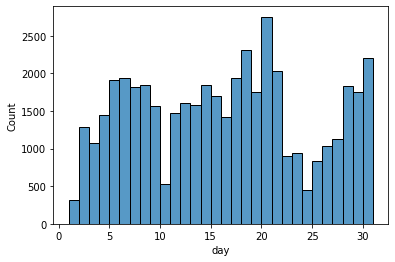

In [8]:
sns.histplot(df['day'], bins=30);

___
## Barplots
Os gráficos de barras são semelhantes aos histogramas, exceto pelo fato de que lidam com dados discretos e geralmente refletem várias variáveis. <br>
para mais detalhes visite <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html'>barplot</a>

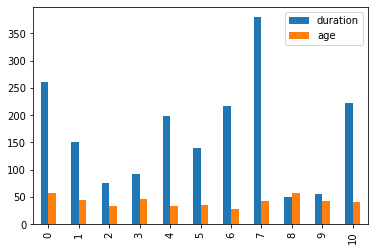

In [9]:
df[['duration', 'age']].loc[:10].plot.bar();

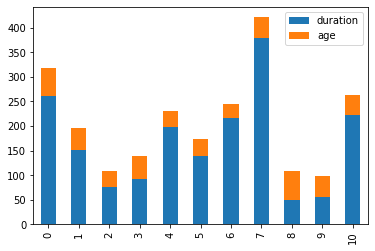

In [10]:
df[['duration', 'age']].loc[:10].plot.bar(stacked=True);

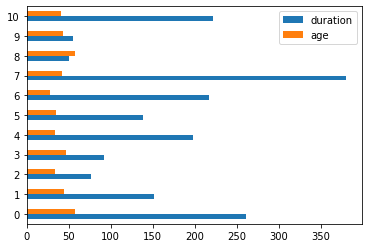

In [11]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df[['duration', 'age']].loc[:10].plot.barh();

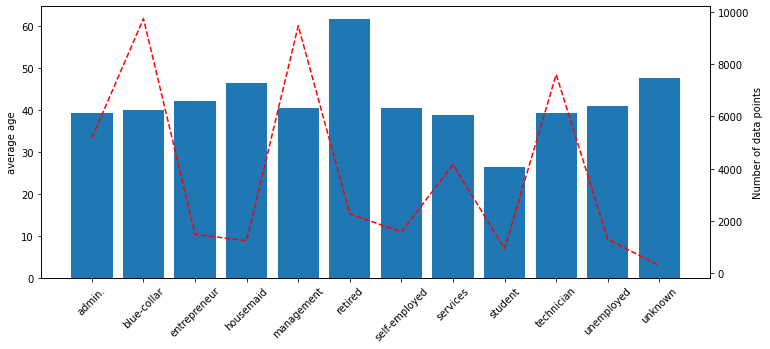

In [13]:
# distribuição de um agrupamento de recurso específico por outro recurso
hist_data = df.groupby('job')['age'].agg(['count', 'mean'])
x_ticks = hist_data.index.values
hist_data = hist_data.reset_index()
fig, ax1 = plt.subplots(figsize=(12, 5))

# combina dois eixos x
ax2 = ax1.twinx()
ax1.set_xlabel('')
ax1.set_ylabel('average age')
ax2.set_ylabel('Number of data points')

ax1.bar(range(len(hist_data)), 'mean', data=hist_data)
ax2.plot(range(len(hist_data)), 'count', data=hist_data, color = 'red', label = 'Number of data points', linestyle='dashed')
plt.xticks(range(len(x_ticks)), x_ticks)
# alterar o alinhamento dos rótulos do eixo x
ax1.tick_params(axis='x', rotation=45)


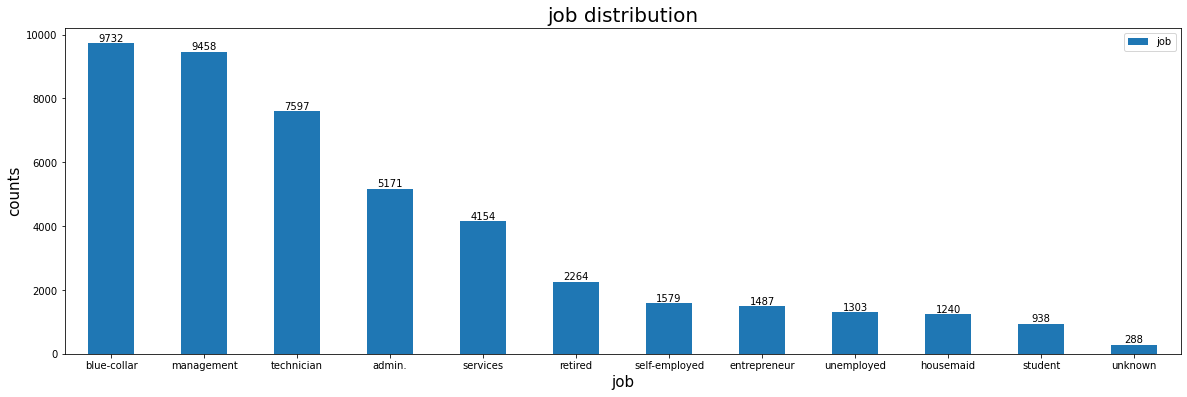

In [14]:
# distribuição de um recurso específico com contagens escritas na parte superior da barra
plot_data = df['job'].value_counts()
ax = plot_data.plot.bar(figsize=(20,6))
x_labels = list(plot_data.index)
ax.set_ylabel('counts', fontsize=15)
ax.set_xlabel('job', fontsize=15)
ax.set_title('job distribution', fontsize=20)
ax.set_xticklabels(x_labels, rotation=0)
ax.legend(labels=['job'])

# adicionar rótulos nas barras
rects = ax.patches
labels = plot_data.values
for i, rect in enumerate(rects):
    ax.annotate(labels[i], xy=(i, rect.get_height()), ha='center', va='bottom')
plt.show()
#plt.savefig('.png', dpi=plt.gcf().dpi, bbox_inches='tight')


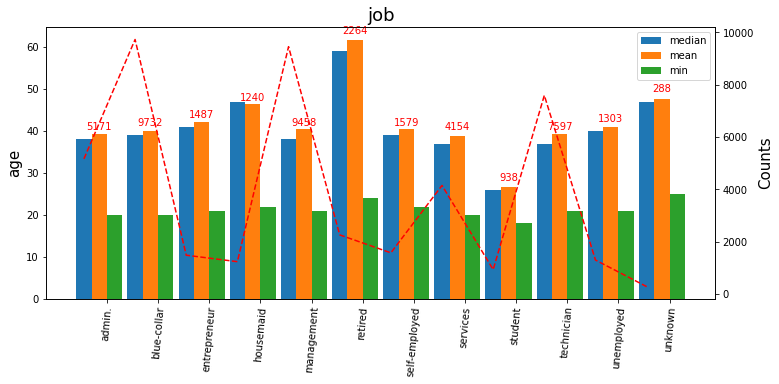

In [15]:

# distribuição de um recurso por um recurso categórico
data = df.groupby(['job'])['age'].describe()[['mean', '50%', 'min', 'count']]

labels = data.index.values
x = np.arange(len(labels))
width = 0.9
fig, ax1 = plt.subplots(figsize=(12, 5))

# barras do gráfico para preço mínimo, mediano e médio da casa
rects1 = ax1.bar(x-width/2, data['50%'], width/3, label='median')
rects2 = ax1.bar(x-width/6, data['mean'], width/3, label='mean')
rects3 = ax1.bar(x+width/6, data['min'], width/3, label='min')

ax1.set_ylabel('age', fontsize=15)
ax1.set_title('job', fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=85)
ax1.legend()

# plotagem de contagens de pontos de dados
ax2 = ax1.twinx()
ax2.set_ylabel('Counts', fontsize=15)
ax2.plot(x-width/2, data['count'], color='red', linestyle='dashed')


# anotar contagens de pontos de dados
for i, rect in enumerate(rects2):
    height = int(round(rect.get_height()))
    ax1.annotate('{}'.format(int(data['count'].iloc[i])),
                 xy=(rect.get_x() + rect.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', color='red')
plt.show()

for more details check- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

___
## Pie Plots

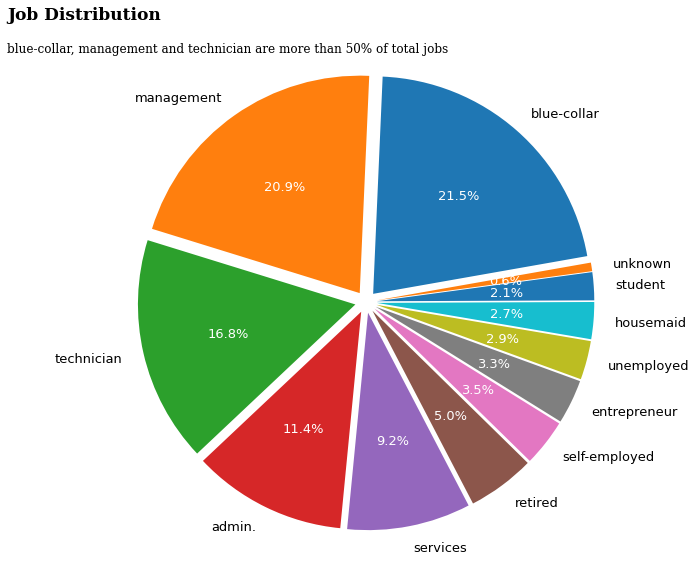

In [16]:
# looking at job distribution
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(df['job'].value_counts(), autopct='%1.1f%%', 
                                    labels=df['job'].value_counts().index,
                                    shadow=False, startangle=10, explode=[0.05]*len(df['job'].unique()));#, colors=['#91b8bd', '#244747']);
plt.setp(texts, size=13);
plt.setp(autotexts, size=13, color='white');
plt.text(-1.65, 1.3, 'Job Distribution', fontfamily='serif', fontsize=17, fontweight='bold');
plt.text(-1.65, 1.15, 'blue-collar, management and technician are more than 50% of total jobs', fontfamily='serif', fontsize=12);
plt.show()

___
## Scatter Plots
Os gráficos de dispersão são uma ferramenta útil para comparar rapidamente duas variáveis ​​e procurar possíveis tendências.

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Advertising.csv')
data = data[data['Radio']>0]
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


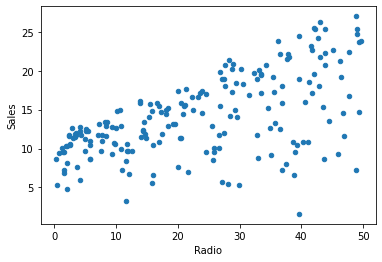

In [24]:
data.plot.scatter(x='Radio', y='Sales');

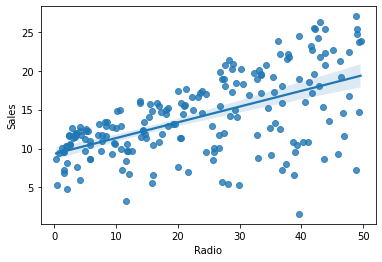

In [19]:
sns.regplot(x='Radio', y='Sales', data=data)
plt.show()

### Scatter plots with colormaps
Você pode usar <strong> c </strong> para colorir cada marcador com base em outro valor de coluna. Use `cmap` para indicar qual mapa de cores usar. <br>

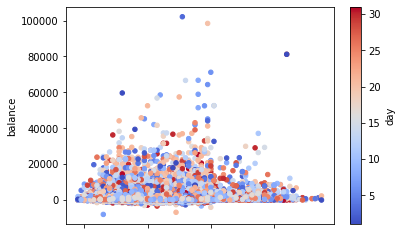

In [20]:
df.plot.scatter(x='age', y='balance', c='day', cmap='coolwarm');

### Scatter plots with sized markers
Como alternativa, você pode usar <strong> s </strong> para indicar o tamanho do marcador com base em outra coluna. O parâmetro <strong> s </strong> deve ser uma matriz, não apenas o nome de uma coluna:

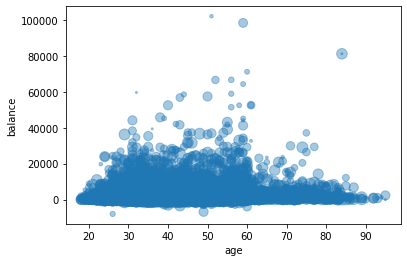

In [21]:
df.plot.scatter(x='age', y='balance', s=df['day']*4, alpha=0.4);

___
## BoxPlots
Os gráficos de caixa, também conhecidos como "diagramas de caixa e bigode", descrevem a distribuição de dados dividindo os dados em <em> quartis </em> sobre a média. <br>

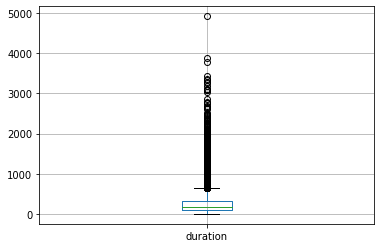

In [22]:
df[['duration']].boxplot()

___
## Line Plots
Os gráficos de linha são usados ​​para comparar duas ou mais variáveis. Por padrão, os valores do eixo x são obtidos do índice.

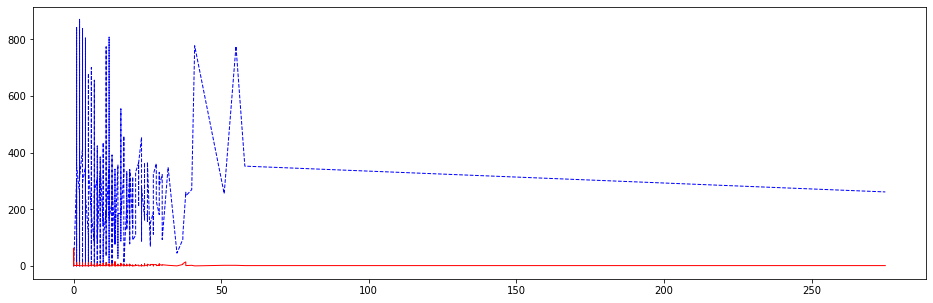

In [27]:
df1 = df.sort_values(by='previous').reset_index()
plt.figure(figsize=(16, 5))

line1 = plt.plot(df1['previous'], df1['pdays'])
plt.setp(line1, color='b', linewidth=1, linestyle='--')

line2 = plt.plot(df1['previous'], df1['campaign'])
plt.setp(line2, color='r', linewidth=1, linestyle='-')

plt.show()

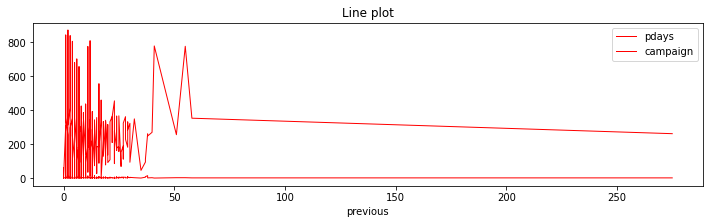

In [28]:
df1 = df.sort_values(by='previous').reset_index()
df1.plot.line(y=['pdays', 'campaign'], x='previous', figsize=(12,3), lw=1, ls='-', c='red', title='Line plot')

	linestyle	ls	'-'	solid line (default)
	linestyle	ls	'--'	dashed line
	linestyle	ls	'-.'	dashed/dotted line
	linestyle	ls	':'	dotted line

___
## Area Plots
As plotagens de área representam plotagens de linha empilhadas cumulativamente, onde o espaço entre as linhas é enfatizado com cores.

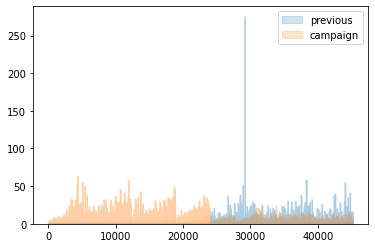

In [29]:
df[['previous', 'campaign']].plot.area(alpha=0.2, stacked=False)

___
## Kernel Density Estimation (KDE) Plot

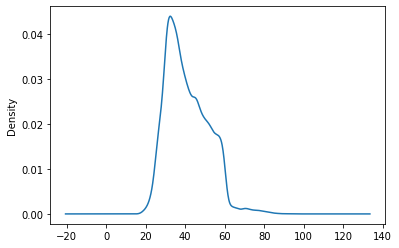

In [30]:
#df['age'].plot.kde();
df['age'].plot.density();

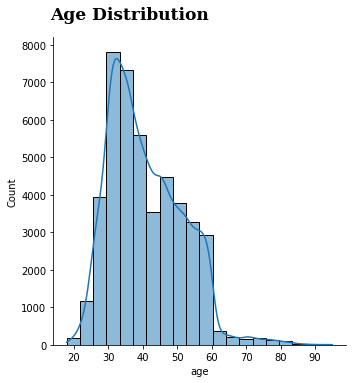

In [31]:
# univariate
sns.displot(x='age', data=df, kde=True, bins=20);
plt.figtext(0.15, 1.02, 'Age Distribution', fontfamily='serif', fontsize=17, fontweight='bold');

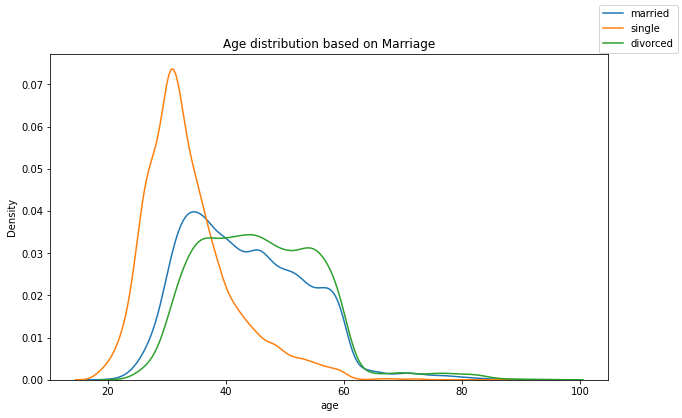

In [32]:
# bivariate
fig = plt.figure(figsize=(10,6))

for value in df['marital'].unique():
    sns.kdeplot(df[df['marital']==value]['age'])

fig.legend(labels=df['marital'].unique())
plt.title('Age distribution based on Marriage')
plt.show()

___
## Correlation Plot

In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Advertising.csv')
data = data[(data['Radio']>0) & (data['TV']>0) & (data['Newspaper']>0)]
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


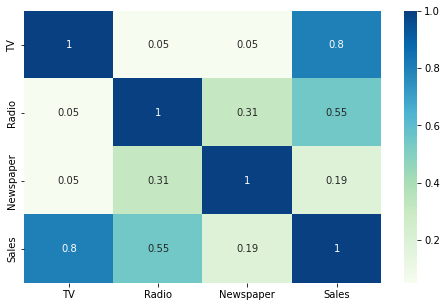

In [34]:
corr = data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(round(data[['TV', 'Radio', 'Newspaper', 'Sales']].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

___
## Hexagonal Bin Plot

Útil para dados bivariados, alternativa ao gráfico de dispersão.

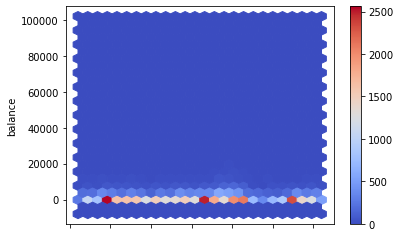

In [35]:
df.plot.hexbin(x='day', y='balance', gridsize=25, cmap='coolwarm')

___
## legend

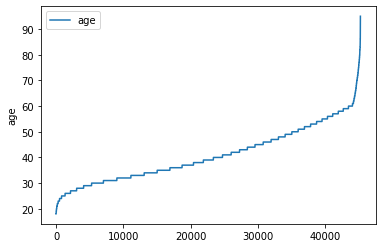

In [36]:
df1 = df.sort_values(by='age').reset_index()
ax = df1.plot.line(y='age')
ax.set(xlabel='', ylabel='age')
ax.legend(loc=0)

<pre>
LOCATION CODE LOCATION STRING
    0	       'best'
	1	       'upper right'
	2	       'upper left'
	3	       'lower left'
	4	       'lower right'
	5	       'right'
	6	       'center left'
	7	       'center right'
	8	       'lower center'
	9	       'upper center'
	10	      'center'
</pre>

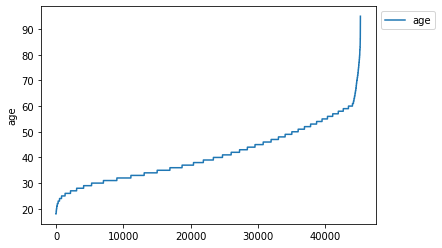

In [37]:
# shift legend outside the plot
ax = df1.plot.line(y='age')
ax.set(xlabel='', ylabel='age')
ax.legend(loc=0, bbox_to_anchor=(1.0,1.0));